In [ ]:

import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
import os

df = pd.read_csv('/content/final_dataset_with_multilabels.csv')  # Adjust path if needed


df['BehavioralChallenges'] = df['BehavioralChallenges'].fillna('Unknown')


os.makedirs('/content/label_encoders', exist_ok=True)


label_encoders = {}  # Dictionary to store encoders

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


    with open(f'/content/label_encoders/{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

print(f"✅ Label encoding completed for {len(object_cols)} columns.")
print(f"✅ Encoders saved in '/content/label_encoders/' folder.")


age_group_idx = df.columns.get_loc('AgeGroupNumeric')

X = df.iloc[:, :age_group_idx + 1 + 38]   
Y = df.iloc[:, age_group_idx + 1 + 38:]   

print(f"✅ X shape: {X.shape}")
print(f"✅ Y shape: {Y.shape}")


✅ Label encoding completed for 24 columns.
✅ Encoders saved in '/content/label_encoders/' folder.
✅ X shape: (400, 69)
✅ Y shape: (400, 0)


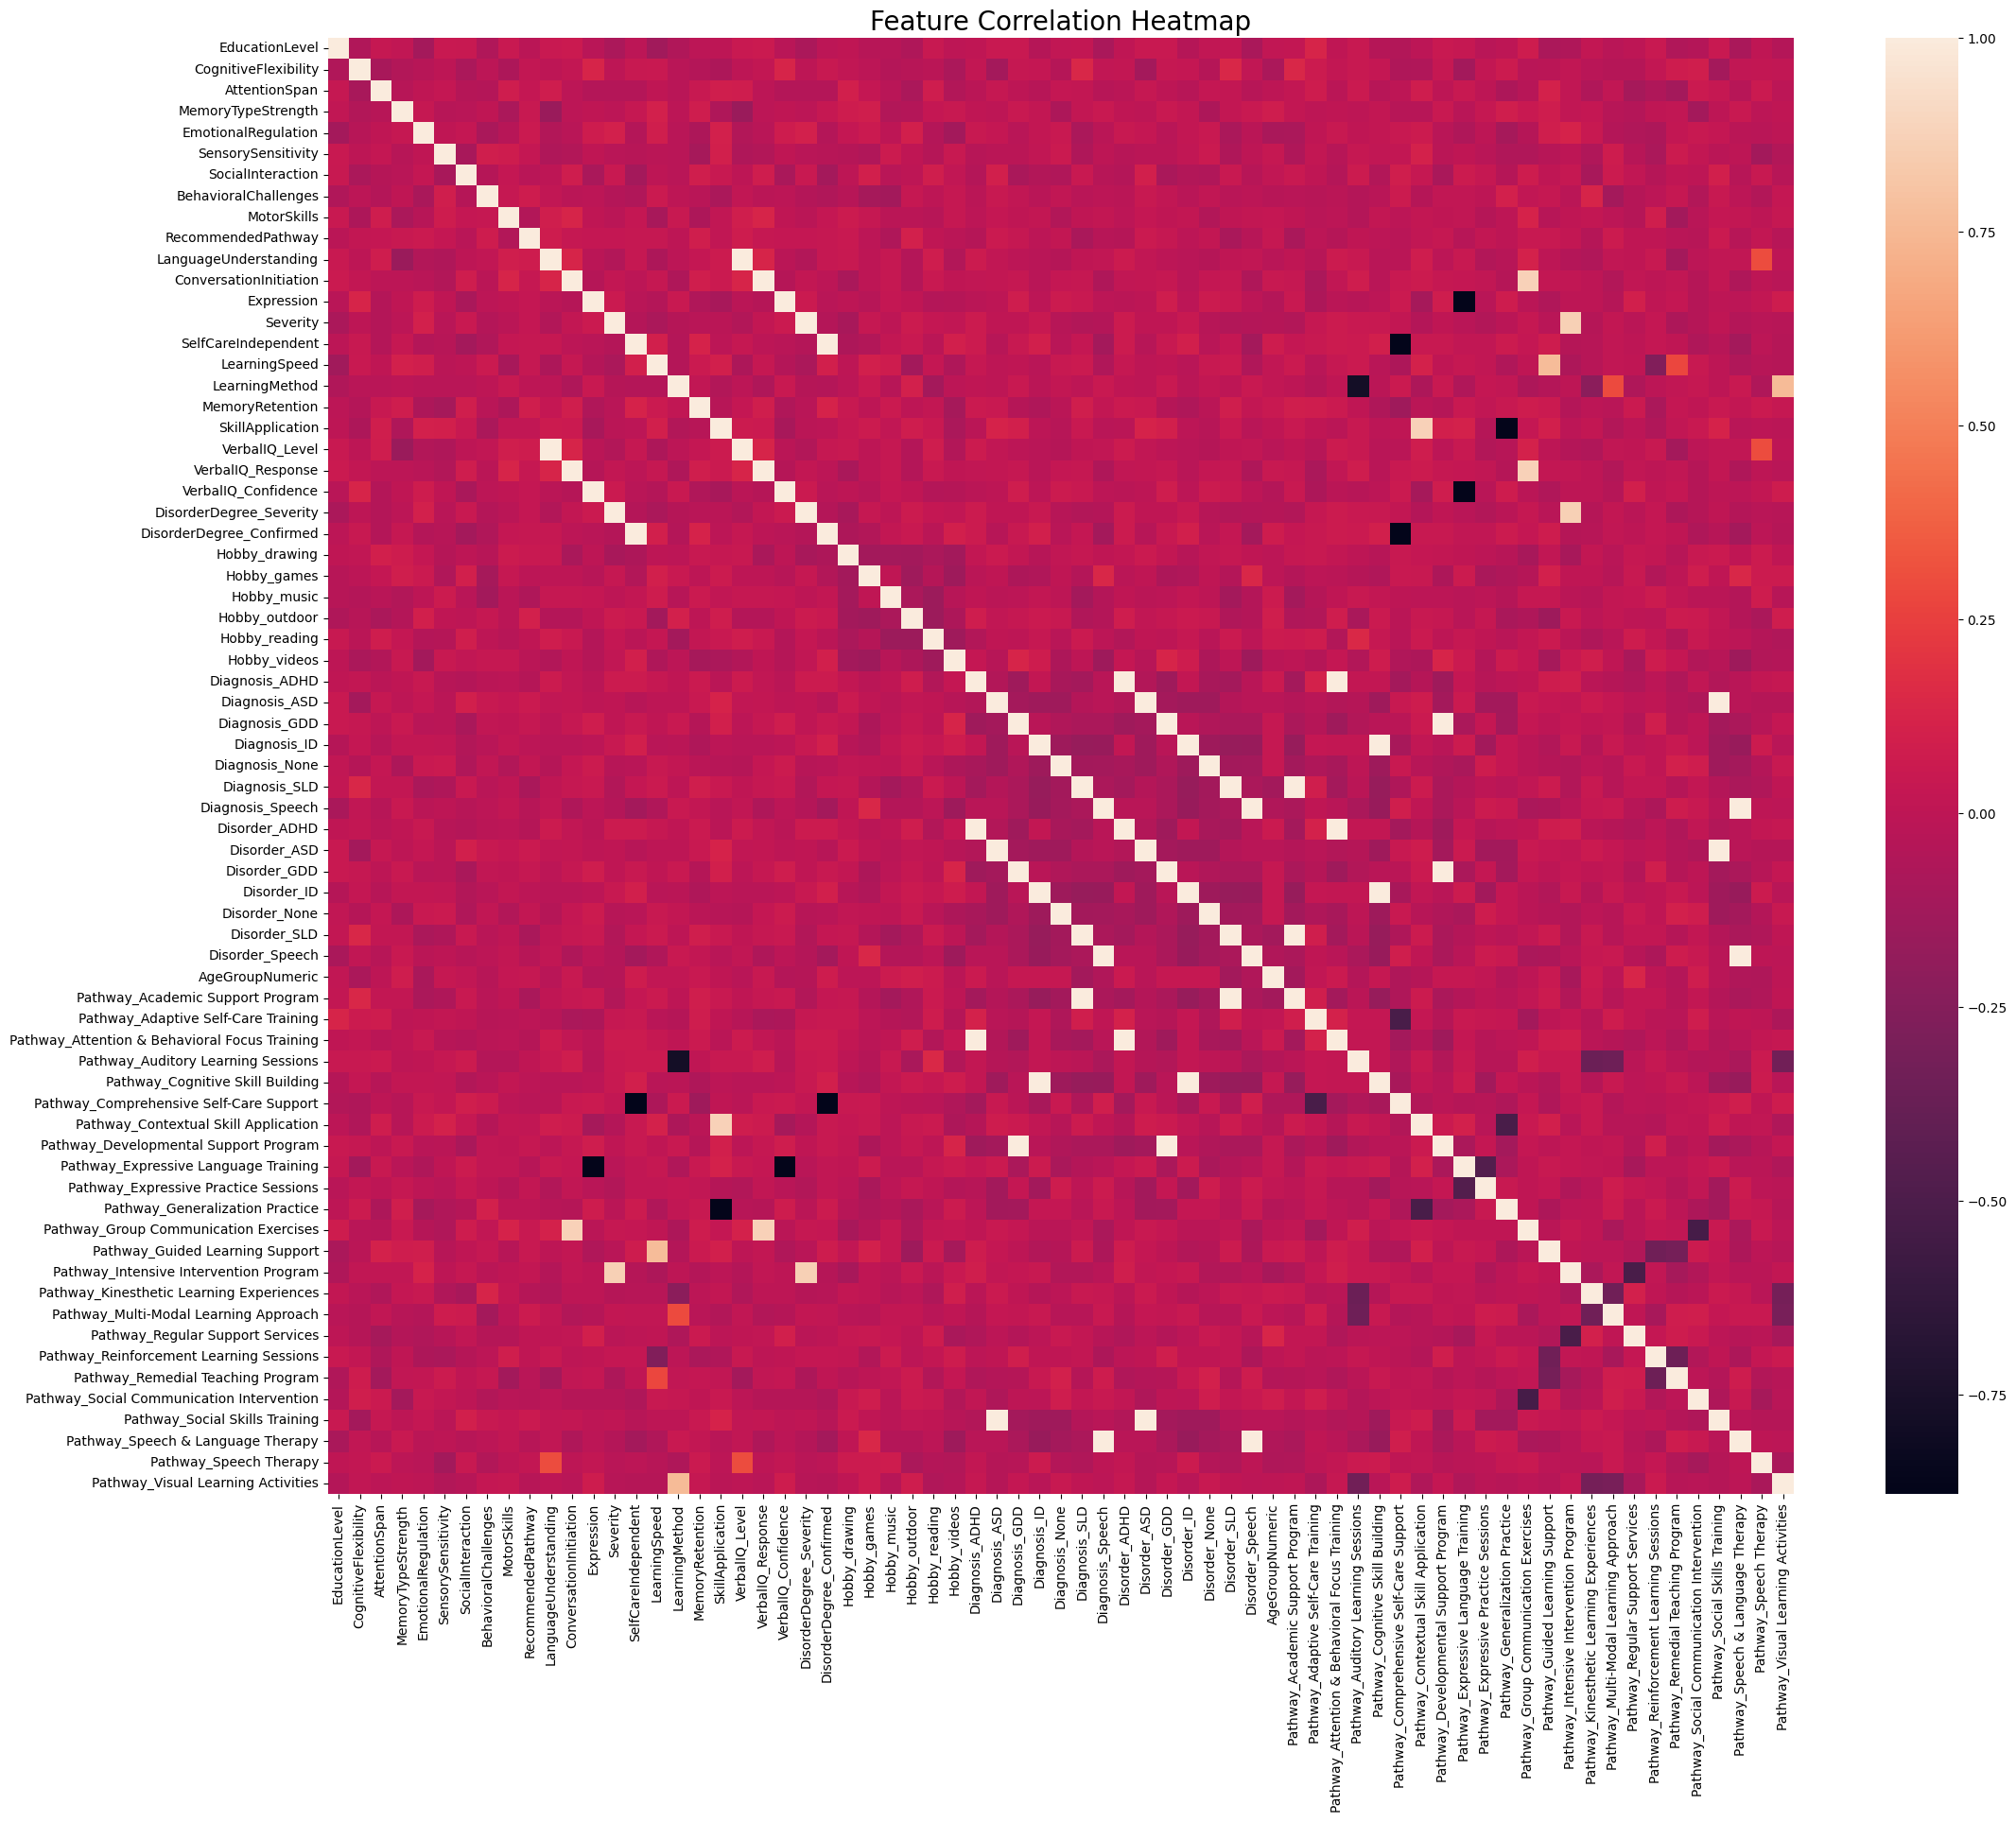

In [ ]:
#using heatmap for better understanding the dataset 
import seaborn as sns
import matplotlib.pyplot as plt

full_data = pd.concat([X, Y], axis=1)

corr_matrix = full_data.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()


In [4]:
df

,EducationLevel,CognitiveFlexibility,AttentionSpan,MemoryTypeStrength,EmotionalRegulation,SensorySensitivity,SocialInteraction,BehavioralChallenges,MotorSkills,RecommendedPathway,...,Pathway_Kinesthetic Learning Experiences,Pathway_Multi-Modal Learning Approach,Pathway_Regular Support Services,Pathway_Reinforcement Learning Sessions,Pathway_Remedial Teaching Program,Pathway_Social Communication Intervention,Pathway_Social Skills Training,Pathway_Speech & Language Therapy,Pathway_Speech Therapy,Pathway_Visual Learning Activities
0,2,1,2,2,1,1,0,1,3,2,...,1,0,0,0,1,1,0,1,1,0
1,1,1,2,2,2,0,2,2,3,0,...,1,0,0,1,0,0,0,0,1,0
2,2,2,1,1,1,3,1,1,1,2,...,0,1,1,0,0,1,1,1,0,0
3,4,0,1,2,1,3,1,0,2,2,...,0,1,0,0,0,1,0,1,0,0
4,4,0,1,3,1,3,1,1,3,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4,0,2,1,1,3,0,1,0,2,...,0,0,1,0,0,0,0,0,0,0
396,0,0,1,1,1,1,2,2,1,0,...,0,1,0,0,0,0,1,0,0,0
397,2,1,2,3,0,3,1,3,3,2,...,1,0,0,0,0,0,0,1,0,0
398,4,2,0,2,2,3,0,2,2,2,...,0,0,0,1,0,0,0,0,0,0


In [5]:
X

,EducationLevel,CognitiveFlexibility,AttentionSpan,MemoryTypeStrength,EmotionalRegulation,SensorySensitivity,SocialInteraction,BehavioralChallenges,MotorSkills,RecommendedPathway,...,Pathway_Kinesthetic Learning Experiences,Pathway_Multi-Modal Learning Approach,Pathway_Regular Support Services,Pathway_Reinforcement Learning Sessions,Pathway_Remedial Teaching Program,Pathway_Social Communication Intervention,Pathway_Social Skills Training,Pathway_Speech & Language Therapy,Pathway_Speech Therapy,Pathway_Visual Learning Activities
0,2,1,2,2,1,1,0,1,3,2,...,1,0,0,0,1,1,0,1,1,0
1,1,1,2,2,2,0,2,2,3,0,...,1,0,0,1,0,0,0,0,1,0
2,2,2,1,1,1,3,1,1,1,2,...,0,1,1,0,0,1,1,1,0,0
3,4,0,1,2,1,3,1,0,2,2,...,0,1,0,0,0,1,0,1,0,0
4,4,0,1,3,1,3,1,1,3,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4,0,2,1,1,3,0,1,0,2,...,0,0,1,0,0,0,0,0,0,0
396,0,0,1,1,1,1,2,2,1,0,...,0,1,0,0,0,0,1,0,0,0
397,2,1,2,3,0,3,1,3,3,2,...,1,0,0,0,0,0,0,1,0,0
398,4,2,0,2,2,3,0,2,2,2,...,0,0,0,1,0,0,0,0,0,0


In [7]:
Y

""
0
1
2
3
4
...
395
396
397
398


In [8]:
print(Y.columns.tolist())


[]


In [ ]:

pathway_cols = [col for col in df.columns if col.startswith('Pathway')]

X = df.drop(columns=pathway_cols)
Y = df[pathway_cols]

print(f"✅ X shape: {X.shape}")
print(f"✅ Y shape: {Y.shape}")
print(f"✅ Y columns: {Y.columns.tolist()}")


✅ X shape: (400, 45)
✅ Y shape: (400, 24)
✅ Y columns: ['Pathway_Academic Support Program', 'Pathway_Adaptive Self-Care Training', 'Pathway_Attention & Behavioral Focus Training', 'Pathway_Auditory Learning Sessions', 'Pathway_Cognitive Skill Building', 'Pathway_Comprehensive Self-Care Support', 'Pathway_Contextual Skill Application', 'Pathway_Developmental Support Program', 'Pathway_Expressive Language Training', 'Pathway_Expressive Practice Sessions', 'Pathway_Generalization Practice', 'Pathway_Group Communication Exercises', 'Pathway_Guided Learning Support', 'Pathway_Intensive Intervention Program', 'Pathway_Kinesthetic Learning Experiences', 'Pathway_Multi-Modal Learning Approach', 'Pathway_Regular Support Services', 'Pathway_Reinforcement Learning Sessions', 'Pathway_Remedial Teaching Program', 'Pathway_Social Communication Intervention', 'Pathway_Social Skills Training', 'Pathway_Speech & Language Therapy', 'Pathway_Speech Therapy', 'Pathway_Visual Learning Activities']


In [10]:
Y

,Pathway_Academic Support Program,Pathway_Adaptive Self-Care Training,Pathway_Attention & Behavioral Focus Training,Pathway_Auditory Learning Sessions,Pathway_Cognitive Skill Building,Pathway_Comprehensive Self-Care Support,Pathway_Contextual Skill Application,Pathway_Developmental Support Program,Pathway_Expressive Language Training,Pathway_Expressive Practice Sessions,...,Pathway_Kinesthetic Learning Experiences,Pathway_Multi-Modal Learning Approach,Pathway_Regular Support Services,Pathway_Reinforcement Learning Sessions,Pathway_Remedial Teaching Program,Pathway_Social Communication Intervention,Pathway_Social Skills Training,Pathway_Speech & Language Therapy,Pathway_Speech Therapy,Pathway_Visual Learning Activities
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,1,0,1,1,0
1,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,1,0,...,0,1,1,0,0,1,1,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1,1,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
396,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
397,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
398,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(24, activation='sigmoid')  # 15 outputs for multi-label classification
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For multi-label, use binary_crossentropy
    metrics=['accuracy']
)


history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


loss, accuracy = model.evaluate(X_test, Y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0350 - loss: 0.7372 - val_accuracy: 0.0156 - val_loss: 0.6800
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0318 - loss: 0.6823 - val_accuracy: 0.0469 - val_loss: 0.6492
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0841 - loss: 0.6524 - val_accuracy: 0.0312 - val_loss: 0.6269
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0625 - loss: 0.6328 - val_accuracy: 0.0625 - val_loss: 0.6078
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1178 - loss: 0.6064 - val_accuracy: 0.1094 - val_loss: 0.5912
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0924 - loss: 0.5893 - val_accuracy: 0.1719 - val_loss: 0.5764
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1256 - loss: 0.5792 - val_accuracy: 0.1719 - val_loss: 0.5635
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1576 - loss: 0.5622 - val_accuracy: 0.2031 - val_loss: 0.5526
Epoch 9/10


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

print(classification_report(Y_test, y_pred_binary))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.26      1.00      0.42        21
           1       0.33      0.75      0.46        24
           2       0.50      0.05      0.08        22
           3       0.30      0.57      0.39        23
           4       0.18      0.11      0.13        19
           5       0.33      0.37      0.35        27
           6       0.34      0.62      0.44        32
           7       0.28      1.00      0.43        22
           8       0.32      0.88      0.47        25
           9       0.45      0.32      0.38        31
          10       0.18      0.12      0.14        26
          11       0.38      0.39      0.39        33
          12       0.00      0.00      0.00        14
          13       0.31      0.30      0.31        30
          14       0.21      0.62      0.32        21
          15       0.12      0.05      0.07        20
          16       0.17      0.08      0.11

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  
    layers.Dropout(0.3),  

    layers.Dense(64, activation='relu'), 
    layers.Dropout(0.3),  

    layers.Dense(32, activation='relu'), 

    layers.Dense(24, activation='sigmoid')  
])


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss='binary_crossentropy',  
    metrics=['accuracy']  
)

history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

model.summary()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.0171 - loss: 0.7239 - val_accuracy: 0.0000e+00 - val_loss: 0.6847
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0117 - loss: 0.6836 - val_accuracy: 0.0000e+00 - val_loss: 0.6707
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0128 - loss: 0.6633 - val_accuracy: 0.0000e+00 - val_loss: 0.6555
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0057 - loss: 0.6475 - val_accuracy: 0.0312 - val_loss: 0.6383
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0227 - loss: 0.6331 - val_accuracy: 0.0312 - val_loss: 0.6193
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0705 - loss: 0.6137 - val_accuracy: 0.0469 - val_loss: 0.6017
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0588 - loss: 0.5947 - val_accuracy: 0.0938 - val_loss: 0.5848
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0771 - loss: 0.5773 - val_accuracy: 0.1562 - val_loss: 0.5717

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,050 (199.42 KB)

 Trainable params: 17,016 (66.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,034 (132.95 KB)

In [ ]:
from sklearn.metrics import classification_report


y_pred_probs = model.predict(X_test)


y_pred = (y_pred_probs > 0.5).astype(int)


print(classification_report(Y_test, y_pred, target_names=Y_test.columns.tolist()))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
                                               precision    recall  f1-score   support

             Pathway_Academic Support Program       1.00      0.33      0.50        21
          Pathway_Adaptive Self-Care Training       0.00      0.00      0.00        24
Pathway_Attention & Behavioral Focus Training       0.86      0.27      0.41        22
           Pathway_Auditory Learning Sessions       0.00      0.00      0.00        23
             Pathway_Cognitive Skill Building       1.00      0.74      0.85        19
      Pathway_Comprehensive Self-Care Support       0.44      0.41      0.42        27
         Pathway_Contextual Skill Application       0.89      0.25      0.39        32
        Pathway_Developmental Support Program       1.00      0.23      0.37        22
         Pathway_Expressive Language Training       0.80      0.16      0.27        25
         Pathway_Expressive Practice Sessions       0.40      0.06      0.11        31
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2531 - loss: 0.5555 

✅ Test Loss: 0.5537
✅ Test Accuracy: 0.2250


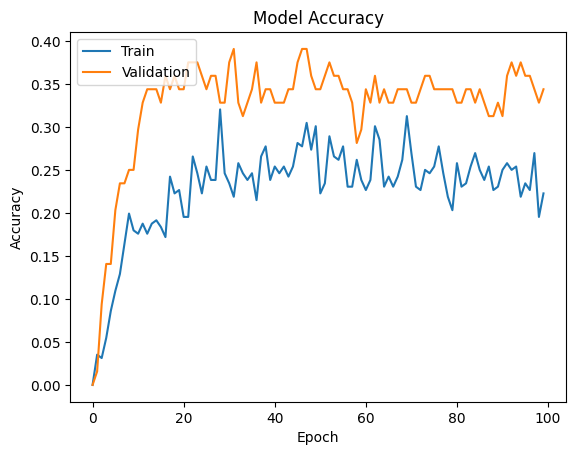

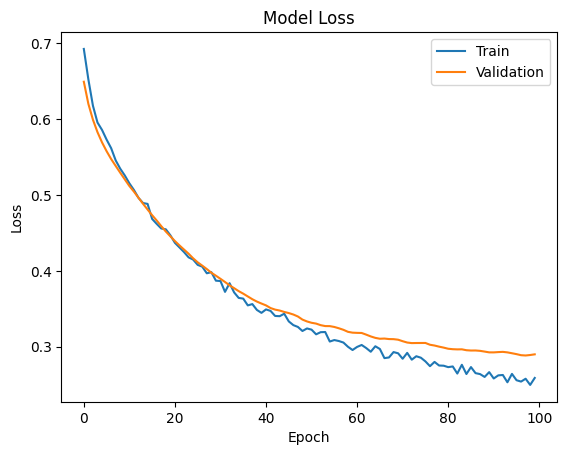

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


rf_model = RandomForestRegressor()
multi_output_rf = MultiOutputRegressor(rf_model)
multi_output_rf.fit(X_train, Y_train)


train_predictions = multi_output_rf.predict(X_train)
test_predictions = multi_output_rf.predict(X_test)


train_mae = mean_absolute_error(Y_train, train_predictions)
train_r2 = r2_score(Y_train, train_predictions)
train_rmse = mean_squared_error(Y_train, train_predictions)


test_mae = mean_absolute_error(Y_test, test_predictions)
test_r2 = r2_score(Y_test, test_predictions)
test_rmse = mean_squared_error(Y_test, test_predictions)


print("Training MAE:", train_mae)
print("Training R²:", train_r2)
print("Training RMSE:", train_rmse)

print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)
print("Testing RMSE:", test_rmse)


Training MAE: 0.0
Training R²: 1.0
Training RMSE: 0.0
Testing MAE: 0.0
Testing R²: 1.0
Testing RMSE: 0.0


In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(multi_output_rf, model_file)

print("Model saved successfully.")

Model saved successfully.
